# Drug Classification Dataset Analysis

## Dataset Overview
This dataset contains information about patients and their prescribed drugs. It's a multiclass classification problem where the goal is to predict which drug would be suitable for a patient based on their characteristics.

## Features
- **Age**: Patient's age (numeric)
- **Sex**: Patient's gender (categorical: F/M)
- **BP**: Blood pressure level (categorical: HIGH/NORMAL/LOW)
- **Cholesterol**: Cholesterol level (categorical: HIGH/NORMAL)
- **Na_to_K**: Sodium to Potassium ratio in blood (numeric)
- **Drug**: Target variable - the drug prescribed (categorical: drugA, drugB, drugC, drugX, DrugY)

## Target Variable (Drug)
The dataset contains 5 different drug types:
- drugA
- drugB
- drugC
- drugX
- DrugY

## Dataset Characteristics
- Number of samples: 200
- Number of features: 5
- Number of classes: 5
- Contains both categorical and numerical features
- Imbalanced classification problem (DrugY appears to be the most common class)

## Data Types
- Categorical features: Sex, BP, Cholesterol, Drug
- Numerical features: Age, Na_to_K

In [47]:
import pandas as pd

df = pd.read_csv(r"datasets/drug200.csv")
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (200, 6)

First few rows of the dataset:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### Check the dataset for missing values.

In [48]:
missing_values = df.isna().sum()
if missing_values.any():
    missing_info = pd.DataFrame({"Missing Values": missing_values})
    print("Columns with missing values:")
    print(missing_info[missing_info["Missing Values"] > 0])
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


#### Chek the dataset for fully duplicated rows.

In [49]:
duplicated_rows = df[df.duplicated(keep=False)]
print(f"Number of fully duplicated rows: {len(duplicated_rows)}")

match len(duplicated_rows):
    case 0:
        print("No fully duplicated rows found in the dataset.")
    case _:
        print("Duplicated rows:")
        print(duplicated_rows.sort_values(by=df.columns.tolist()))

Number of fully duplicated rows: 0
No fully duplicated rows found in the dataset.


#### Check if the dataset is balances by the target column `Drug`

Distribution of Drug types:
       Count  Percentage
Drug                    
DrugY     91        45.5
drugX     54        27.0
drugA     23        11.5
drugC     16         8.0
drugB     16         8.0


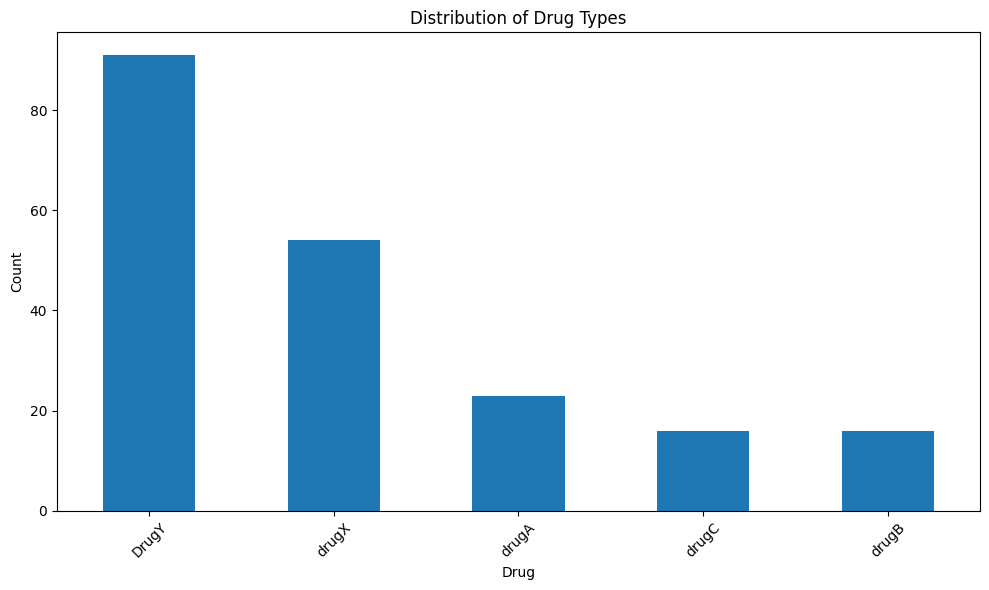


The dataset is imbalanced
Imbalance ratio: 1.88


In [50]:
import matplotlib.pyplot as plt

drug_distribution = df["Drug"].value_counts()
drug_percentages = df["Drug"].value_counts(normalize=True) * 100

distribution_summary = pd.DataFrame({
    "Count": drug_distribution,
    "Percentage": drug_percentages,
})

print("Distribution of Drug types:")
print(distribution_summary)

# Visualize the distribution
plt.figure(figsize=(10, 6))
drug_distribution.plot(kind="bar")
plt.title("Distribution of Drug Types")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check if dataset is balanced
max_diff = drug_distribution.max() - drug_distribution.min()
mean_count = drug_distribution.mean()
imbalance_ratio = max_diff / mean_count

imbalance_ratio_threshold = 0.2  # threshold of 20% difference
if imbalance_ratio < imbalance_ratio_threshold:
    print("\nThe dataset is relatively balanced")
else:
    print("\nThe dataset is imbalanced")
    print(f"Imbalance ratio: {imbalance_ratio:.2f}")


#### Check if on average, people with normal blood pressure `(BP)` have the highest level of `Na` to `K` ratio

Average Na to K ratio by blood pressure category:
BP
HIGH      17.040623
LOW       16.539797
NORMAL    14.342746
Name: Na_to_K, dtype: float64


People with NORMAL blood pressure do NOT have the highest average Na to K ratio


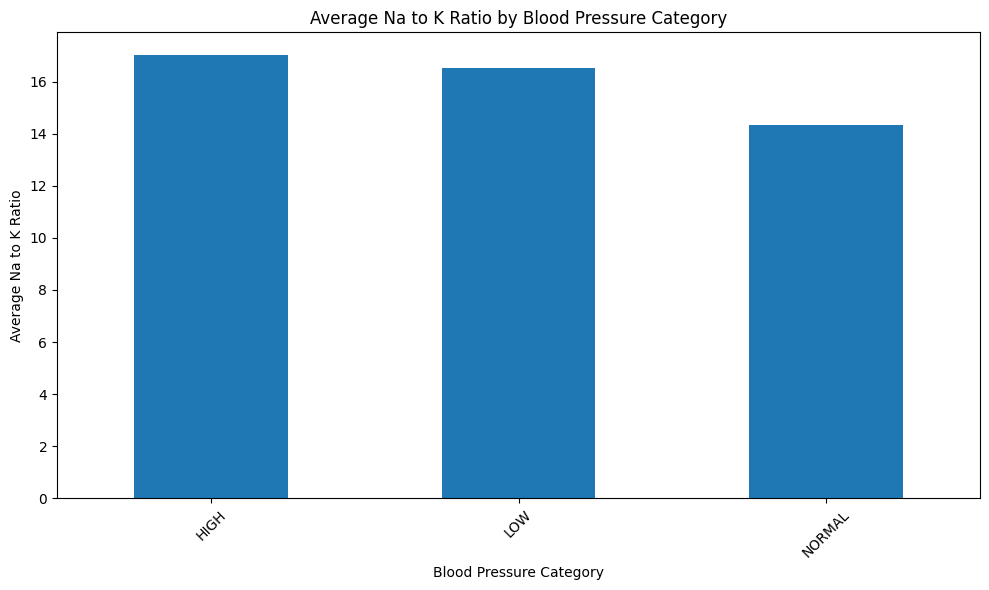

In [51]:
# Calculate mean Na_to_K ratio for each BP category
bp_na_to_k_means = df.groupby("BP")["Na_to_K"].mean()

print("Average Na to K ratio by blood pressure category:")
print(bp_na_to_k_means)
print("\n")

# Check if NORMAL BP has highest Na_to_K ratio
is_normal_highest = bp_na_to_k_means["NORMAL"] > bp_na_to_k_means[["HIGH", "LOW"]].max()

if is_normal_highest:
    print("People with NORMAL blood pressure have the highest average Na to K ratio")
else:
    print("People with NORMAL blood pressure do NOT have the highest average Na to K ratio")

# Visualize the comparison
plt.figure(figsize=(10, 6))
bp_na_to_k_means.plot(kind="bar")
plt.title("Average Na to K Ratio by Blood Pressure Category")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Average Na to K Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Encode categorical features (`Sex`, `Cholesterol`, `BP`) to numbers.
Use the following rules:
```
- 'Sex': M = 0, F = 1
- 'Cholesterol': NORMAL = 0, HIGH = 1
- 'BP': LOW = -1, NORMAL = 0, HIGH = 1
```

In [52]:
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["Cholesterol"] = df["Cholesterol"].map({"NORMAL": 0, "HIGH": 1})
df["BP"] = df["BP"].map({"LOW": -1, "NORMAL": 0, "HIGH": 1})
print("First few rows of encoded dataframe:")
print(df.head())


First few rows of encoded dataframe:
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    1   1            1   25.355  DrugY
1   47    0  -1            1   13.093  drugC
2   47    0  -1            1   10.114  drugC
3   28    1   0            1    7.798  drugX
4   61    1  -1            1   18.043  DrugY


#### Use `Drug` as a target and other features as predictors. Split the data with stratification by target.

In [53]:
from sklearn.model_selection import train_test_split

# Split the data with stratification by target
X = df.drop("Drug", axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, stratify=y)
drug_a_count = y_test.value_counts()["drugA"]
print(f"Number of drugA samples in the test set: {drug_a_count}")


Number of drugA samples in the test set: 6


#### Fit StandardScaler on train data, and then transform train and test data.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First few rows of scaled training data:")
print(X_train_scaled[:5])


First few rows of scaled training data:
[[-1.76688399  1.040833    1.12641512 -0.97367959 -0.09408193]
 [ 0.13805701 -0.96076892 -1.2702128   1.0270319  -0.41529182]
 [-0.78368863  1.040833   -0.07189884  1.0270319  -1.1597882 ]
 [-1.27528631 -0.96076892 -0.07189884  1.0270319   1.26738136]
 [ 0.38385585 -0.96076892  1.12641512  1.0270319   0.27432182]]


#### Fit KNN classifier on non-scaled data. (`non-scaled model`)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

non_scaled_model = KNeighborsClassifier()
non_scaled_model.fit(X_train, y_train)

print(f"Non-scaled model training score: {non_scaled_model.score(X_train, y_train):.3f}")
print(f"Non-scaled model test score: {non_scaled_model.score(X_test, y_test):.3f}")


Non-scaled model training score: 0.813
Non-scaled model test score: 0.680


#### Fit KNN classifier on scaled data. (`scaled model`)

In [56]:
scaled_model = KNeighborsClassifier()
scaled_model.fit(X_train_scaled, y_train)

print(f"Scaled model training score: {scaled_model.score(X_train_scaled, y_train):.3f}")
print(f"Scaled model test score: {scaled_model.score(X_test_scaled, y_test):.3f}")


Scaled model training score: 0.887
Scaled model test score: 0.760


#### Get predictions on test data for all models.

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_non_scaled = non_scaled_model.predict(X_test)
y_pred_scaled = scaled_model.predict(X_test_scaled)

#### Calculate accuracy, micro and macro recalls and precisions for both models.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics for non-scaled model
non_scaled_accuracy = accuracy_score(y_test, y_pred_non_scaled)
non_scaled_precision_micro = precision_score(y_test, y_pred_non_scaled, average="micro")
non_scaled_precision_macro = precision_score(y_test, y_pred_non_scaled, average="macro")
non_scaled_recall_micro = recall_score(y_test, y_pred_non_scaled, average="micro")
non_scaled_recall_macro = recall_score(y_test, y_pred_non_scaled, average="macro")

# Calculate metrics for scaled model
scaled_accuracy = accuracy_score(y_test, y_pred_scaled)
scaled_precision_micro = precision_score(y_test, y_pred_scaled, average="micro")
scaled_precision_macro = precision_score(y_test, y_pred_scaled, average="macro")
scaled_recall_micro = recall_score(y_test, y_pred_scaled, average="micro")
scaled_recall_macro = recall_score(y_test, y_pred_scaled, average="macro")

print("Non-scaled model metrics:")
print(f"Accuracy: {non_scaled_accuracy:.3f}")
print(f"Micro-averaged precision: {non_scaled_precision_micro:.3f}")
print(f"Macro-averaged precision: {non_scaled_precision_macro:.3f}")
print(f"Micro-averaged recall: {non_scaled_recall_micro:.3f}")
print(f"Macro-averaged recall: {non_scaled_recall_macro:.3f}")
print("\nScaled model metrics:")
print(f"Accuracy: {scaled_accuracy:.3f}")
print(f"Micro-averaged precision: {scaled_precision_micro:.3f}")
print(f"Macro-averaged precision: {scaled_precision_macro:.3f}")
print(f"Micro-averaged recall: {scaled_recall_micro:.3f}")
print(f"Macro-averaged recall: {scaled_recall_macro:.3f}")


Non-scaled model metrics:
Accuracy: 0.680
Micro-averaged precision: 0.680
Macro-averaged precision: 0.544
Micro-averaged recall: 0.680
Macro-averaged recall: 0.568

Scaled model metrics:
Accuracy: 0.760
Micro-averaged precision: 0.760
Macro-averaged precision: 0.717
Micro-averaged recall: 0.760
Macro-averaged recall: 0.782


#### Confusion matrix for `non-scaled` model.

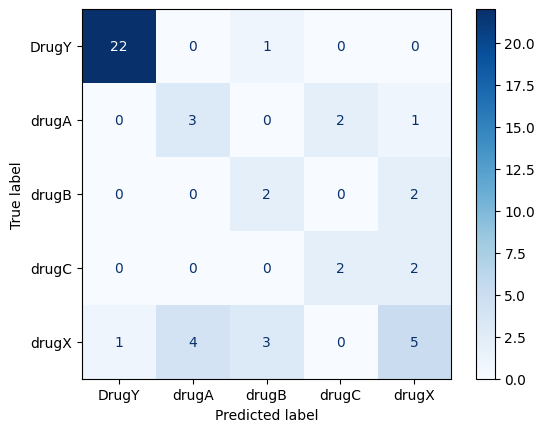

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_non_scaled, cmap="Blues")

#### Confusion matrix for `scaled` model.

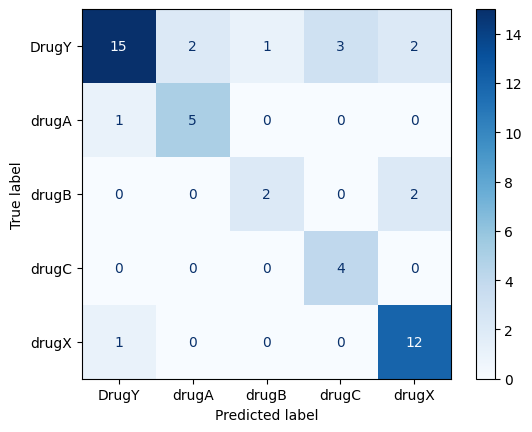

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_scaled, cmap="Blues")